In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.decomposition
import sklearn.grid_search
import sklearn.neighbors
import sklearn.metrics
from sklearn import model_selection

In [9]:
digits = sklearn.datasets.load_digits()
X = digits.data
Y = digits.target

print X.shape, Y.shape

(1797, 64) (1797,)


In [11]:
#Train-Test split and mean optimization
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)

In [12]:
X_norm = np.mean(X_train, axis = 0)
X_train_norm = X_train - X_norm
X_test_norm = X_test - X_norm

print X_train_norm.shape
print X_test_norm.shape
print Y_train.shape
print Y_test.shape

(1203, 64)
(594, 64)
(1203,)
(594,)


In [14]:
##Projection of principal components
svd = sklearn.decomposition.TruncatedSVD(n_components = 2)
X_2d = svd.fit_transform(X_train_norm)

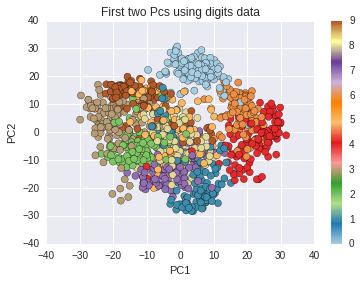

In [15]:
plt.scatter(X_2d[:,0], X_2d[:,1], c=Y_train, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two Pcs using digits data')
plt.show()

In [41]:
##Cross Validation to estimate the optimal value of K
def compute_test(x_test, y_test, clf, cv):
    Kfolds = model_selection.KFold(n_splits =cv)
    scores = []
    for i, j in Kfolds.split(x_test):
        test_set = x_test[j]
        test_labels = y_test[j]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_set)))
        
    return scores

In [44]:
# Implementation of K nearnest neighbor
k = np.arange(20)+1
parameters = {'n_neighbors': k}

knearest = sklearn.neighbors.KNeighborsClassifier()
clf = model_selection.GridSearchCV(knearest, parameters, cv=10)

accuracy = []
params = []

no_of_dimensions = range(1,11)

for d in no_of_dimensions:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d<64:
        X_fit = svd.fit_transform(X_train)
        X_fit_atest = svd.transform(X_test)
    else:
        X_nl = X_train
        X_nl1 = X_test
    clf.fit(X_fit, Y_train)
    
    accuracy.append(compute_test(x_test = X_fit_atest, y_test = Y_test, clf=clf, cv=10))
    params.append(clf.best_params_['n_neighbors'])
    print params

[18]
[18, 16]
[18, 16, 12]
[18, 16, 12, 10]
[18, 16, 12, 10, 16]
[18, 16, 12, 10, 16, 6]
[18, 16, 12, 10, 16, 6, 9]
[18, 16, 12, 10, 16, 6, 9, 1]
[18, 16, 12, 10, 16, 6, 9, 1, 1]
[18, 16, 12, 10, 16, 6, 9, 1, 1, 1]
